In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import multiclass
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score ,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
news = pd.read_csv('vesti.csv')

In [3]:
X = news['text']
y = news['category']

In [4]:
X_train, X_test, y_train, y_test = model_selection.\
    train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 4)

In [5]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()
tfidf_vectorizer.fit(X_train.values.astype('U'))

TfidfVectorizer()

In [6]:
X_train = tfidf_vectorizer.transform(X_train.values.astype('U'))
X_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [7]:
y_train = y_train.astype('category')
y_test = y_test.astype('category')

In [8]:
classes = dict(enumerate(y_train.cat.categories))
y_train = y_train.cat.codes
y_test = y_test.cat.codes

In [9]:
alphas=[0.005,0.006,0.007,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
best_acc=0
best_alpha=None
bayesArray=[]
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    bayesArray.append(accuracy)
    if accuracy> best_acc:
        best_acc = accuracy
        best_alpha = alpha
print('Najbolja preciznost na test skupu je: ', best_acc)
print('Najbolji alfa parametar modela su: ', best_alpha)

Najbolja preciznost na test skupu je:  0.6983233405037607
Najbolji alfa parametar modela su:  0.02


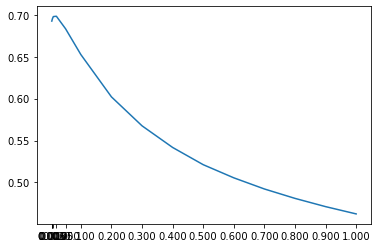

In [10]:
plt.plot(alphas,bayesArray)
plt.xticks(alphas)
plt.show()

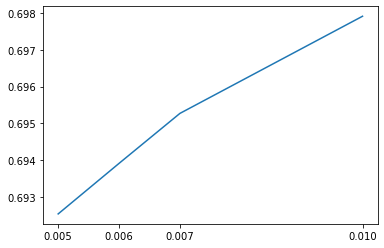

In [11]:
plt.plot(alphas[0:4],bayesArray[0:4])
plt.xticks(alphas[0:4])
plt.show()

In [12]:
model = MultinomialNB(alpha=best_alpha)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
matrix=metrics.confusion_matrix(y_test, y_predict)
print(matrix)

[[ 790   12    7 ...   40    4   12]
 [   7  676    7 ...   40   12    7]
 [   0    6 1015 ...  179    6   37]
 ...
 [   3    1   30 ... 5179    5   17]
 [   5   15   28 ...  113  335    8]
 [   5    4   28 ...   27    0 2034]]


In [13]:
n_neighbors_list=list(range(1, 21))
best_acc_test=0
best_acc_train=0
best_n=None
knnArray=[]
for n_neighbors in n_neighbors_list:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_predict = knn_model.predict(X_test)
    accuracy_test = accuracy_score(y_test,y_predict)
    knnArray.append(accuracy_test)
    if accuracy_test> best_acc_test:
        best_acc_test = accuracy_test
        best_n = n_neighbors
print('Najbolji rezultat na test skupu je: ',best_acc_test)
print('Najbolji parametri modela su: ', best_n)

Najbolji rezultat na test skupu je:  0.6711672540314584
Najbolji parametri modela su:  17


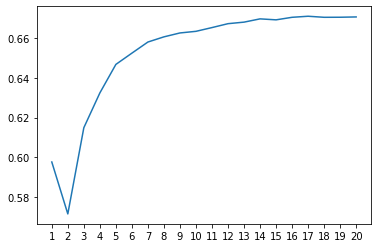

In [14]:
plt.plot(n_neighbors_list,knnArray)
plt.xticks(n_neighbors_list)
plt.show()

In [15]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=best_n)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
matrix=metrics.confusion_matrix(y_test, y_predict)
print(matrix)

[[ 782   15   10 ...   35    4   14]
 [  12  734   10 ...   27   10    6]
 [   5   10 1044 ...  105    9   32]
 ...
 [  10   10   60 ... 4465   21   11]
 [   5   15   28 ...   87  349    6]
 [   7   12   33 ...   33   12 1863]]


In [16]:
ovr = multiclass.OneVsRestClassifier(svm.LinearSVC(loss = 'hinge'))
ovr.fit(X_train, y_train)
y_predicted_ovr = ovr.predict(X_test)
print(metrics.classification_report(y_test, y_predicted_ovr, target_names=classes.values()))

                  precision    recall  f1-score   support

  ARTS & CULTURE       0.77      0.71      0.74      1264
    BLACK VOICES       0.71      0.55      0.62      1488
        BUSINESS       0.64      0.58      0.61      1950
         COLLEGE       0.62      0.56      0.59       377
          COMEDY       0.69      0.65      0.67      1683
           CRIME       0.61      0.64      0.62      1120
         DIVORCE       0.82      0.81      0.81      1126
       EDUCATION       0.56      0.53      0.54       331
   ENTERTAINMENT       0.77      0.81      0.79      5287
     ENVIRONMENT       0.56      0.32      0.40       411
           FIFTY       0.65      0.52      0.58       462
    FOOD & DRINK       0.77      0.85      0.81      2050
       GOOD NEWS       0.68      0.51      0.58       461
           GREEN       0.53      0.42      0.47       862
  HEALTHY LIVING       0.66      0.39      0.49      2199
   HOME & LIVING       0.86      0.87      0.87      1342
          IMP

In [17]:
ovo = multiclass.OneVsOneClassifier(linear_model.LogisticRegression(max_iter = 1000))
ovo.fit(X_train, y_train)
y_predicted_ovo = ovo.predict(X_test)
print(metrics.classification_report(y_test, y_predicted_ovo, target_names=classes.values()))

                  precision    recall  f1-score   support

  ARTS & CULTURE       0.83      0.59      0.69      1264
    BLACK VOICES       0.75      0.42      0.53      1488
        BUSINESS       0.63      0.52      0.57      1950
         COLLEGE       0.59      0.38      0.46       377
          COMEDY       0.71      0.58      0.64      1683
           CRIME       0.65      0.55      0.59      1120
         DIVORCE       0.88      0.67      0.76      1126
       EDUCATION       0.66      0.34      0.45       331
   ENTERTAINMENT       0.66      0.83      0.74      5287
     ENVIRONMENT       0.79      0.11      0.19       411
           FIFTY       0.79      0.16      0.27       462
    FOOD & DRINK       0.75      0.79      0.77      2050
       GOOD NEWS       0.85      0.40      0.54       461
           GREEN       0.54      0.33      0.41       862
  HEALTHY LIVING       0.74      0.30      0.43      2199
   HOME & LIVING       0.92      0.74      0.82      1342
          IMP